# Extracting Text

In [1]:
%%capture
!pip install PyPDF2
!pip install datasets
!pip install torch
!pip install transformers==4.12.3
!pip install datasets

In [1]:
from utils import extract_text_from_pdf, save_text_to_file, word_count_clean, word_count, save_plot
from utils import unicodedata, nltk, snowball_stemmer, re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CarolinaSoria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CarolinaSoria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CarolinaSoria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\CarolinaSoria\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CarolinaSoria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CarolinaSoria\AppData\Roaming\nltk_data...
[nltk_data

In [4]:
pdf_file_path = "files/el-amante-japones-isabel-allende.pdf"
extracted_text = extract_text_from_pdf(pdf_file_path)

In [5]:
output_file_path = "files/extracted_text.txt"
save_text_to_file(extracted_text, output_file_path)

# Preprocessing Text

In [18]:
text_lower = extracted_text.lower()
text_normalized = unicodedata.normalize('NFKD', text_lower).encode('ascii', 'ignore').decode('utf-8')
filtered_text = re.sub('[^A-Za-z0-9\s]', ' ', text_normalized)
#filtered_text = re.sub('[^A-Za-z0-9áéíóúÁÉÍÓÚñÑüÜ\s]', ' ',text_lower)
tokens = nltk.word_tokenize(filtered_text)
tokens_no_stopwords = [word for word in tokens if word not in nltk.corpus.stopwords.words('spanish')]
stemmed_words = [snowball_stemmer.stem(word) for word in tokens_no_stopwords]


# Getting Most Common Stemmed Tokens


In [19]:
freq = nltk.FreqDist(stemmed_words)
print(freq.most_common(200))

[('habi', 747), ('alma', 566), ('mas', 382), ('irin', 342), ('anos', 276), ('ichimei', 253), ('pas', 209), ('sol', 208), ('nathaniel', 201), ('si', 191), ('cas', 186), ('belasc', 182), ('seth', 167), ('teni', 159), ('podi', 153), ('dos', 149), ('vid', 147), ('mism', 141), ('famili', 139), ('despu', 135), ('lleg', 135), ('ser', 133), ('vez', 128), ('hac', 126), ('hous', 120), ('hij', 119), ('lark', 116), ('tiemp', 112), ('hombr', 110), ('siempr', 109), ('primer', 108), ('isaac', 108), ('man', 107), ('padr', 106), ('llev', 106), ('mes', 106), ('nin', 105), ('amor', 104), ('dij', 103), ('pregunt', 99), ('abuel', 99), ('esper', 98), ('tan', 97), ('dia', 96), ('nadi', 95), ('nunc', 95), ('viv', 94), ('fukud', 93), ('dej', 92), ('llam', 91), ('iba', 91), ('trabaj', 89), ('qued', 89), ('hor', 88), ('lenny', 88), ('buen', 85), ('habl', 83), ('haci', 83), ('unic', 82), ('pud', 82), ('noch', 82), ('lilli', 82), ('muj', 81), ('tres', 80), ('pued', 79), ('part', 78), ('habri', 77), ('tard', 75), (

# Word Counts (Uncleaned and Cleaned Text)

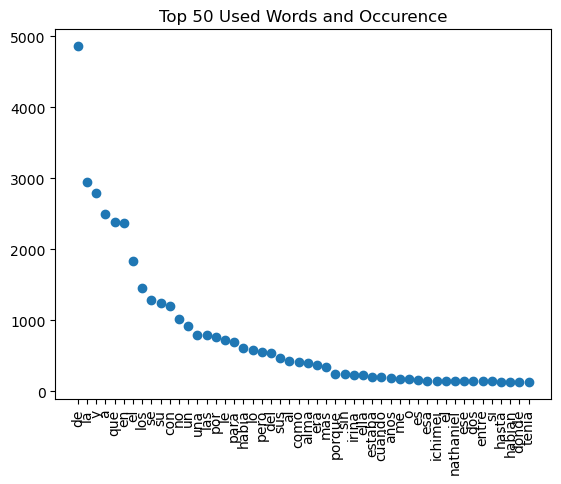

In [20]:
word_count(extracted_text)

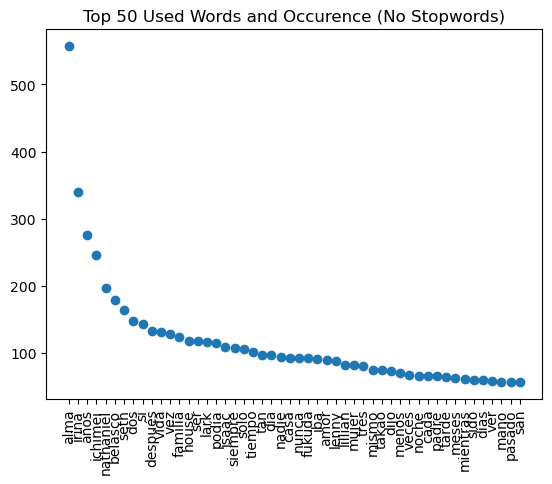

In [21]:
word_count_clean(extracted_text)

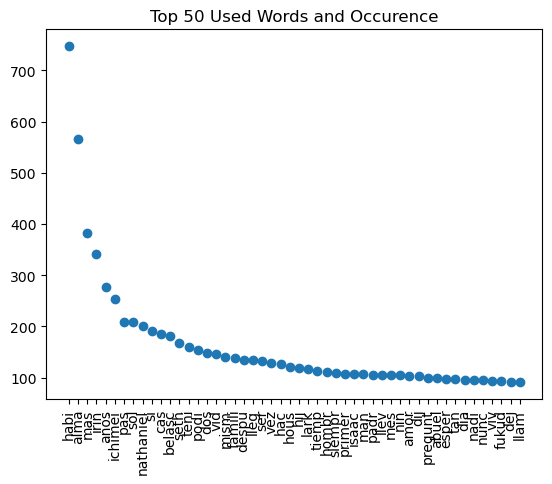

In [22]:
word_count(stemmed_words)

# More Analysis (Lexical Dispersion, Collocations)


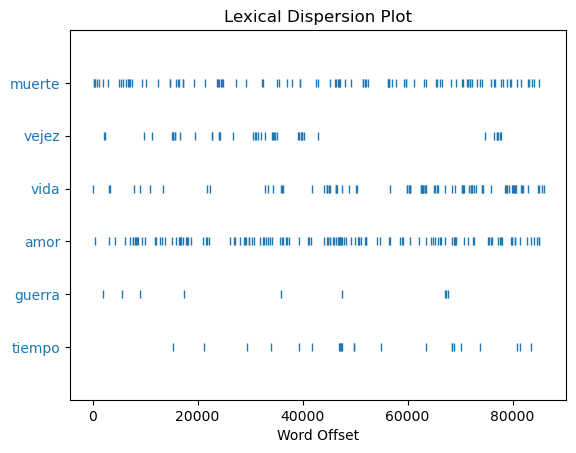

In [23]:
ntext = nltk.Text(tokens)
dispersion_plot = ntext.dispersion_plot(['tiempo', 'guerra', 'amor', 'vida', 'vejez', 'muerte'])
save_plot(dispersion_plot)

In [24]:
ntext.collocations(window_size=2, num=30)

lark house; san francisco; sea cliff; isaac belasco; hans voigt; mas
tarde; catherine hope; jacques devine; lenny beal; estados unidos; los
fukuda; sus padres; boyd anderson; los ojos; habia sido; tal vez;
irina bazili; una vez; primera vez; tia lillian; lupita farias; habia
visto; ron wilkins; con una; cada uno; habia hecho; los belasco; sus
abuelos; miss honeycomb; vera neumann


# Initial Characters Analysis

In [25]:
for name in ('Alma', 'Ichimei', 'Nathaniel', 'Seth', 'Irina', 'Isaac', 'Lenny', 'Lillian'):
    print('{}:'.format(name), freq.get(name.lower()))

Alma: 566
Ichimei: 253
Nathaniel: 201
Seth: 167
Irina: None
Isaac: 108
Lenny: 88
Lillian: None
